##  [ CM 6 ]
__KEVAL PRAJAPATI (20908584, kbprajap@uwaterloo.ca)__


In [2]:
# AUTHOR; KEVAL PRAJAPATI
# IMPORTING NECESSARY LIBRARIES
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential, regularizers
from tensorflow.keras.layers import Dense, Dropout, Flatten
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
from tensorflow.keras.callbacks import LearningRateScheduler
from math import exp, pow, floor
import time

__1) Importing the dataset and splitting the dataset into train and test sets__

In [69]:
#Features
X_train = pd.read_csv('D:\COLLEGE\Waterloo\TERM 1\ECE 657A\Assigments\Assignment 3\Dataset\Fashion_MNIST\grainX.csv')
X_test = pd.read_csv('D:\COLLEGE\Waterloo\TERM 1\ECE 657A\Assigments\Assignment 3\Dataset\Fashion_MNIST\gestX.csv')

#Labels
Y_train = pd.read_csv('D:\COLLEGE\Waterloo\TERM 1\ECE 657A\Assigments\Assignment 3\Dataset\Fashion_MNIST\grainY.csv')
Y_test = pd.read_csv('D:\COLLEGE\Waterloo\TERM 1\ECE 657A\Assigments\Assignment 3\Dataset\Fashion_MNIST\gestY.csv')

del X_train['Id']
del Y_train['Id']
del X_test['Id']
del Y_test['Id']

__2) Checking the dimensions of the features and labels__

In [70]:
# Dimensions of training and testing data
print('X_train:',X_train.shape)
print('Y_train:',Y_train.shape)
print('X_test:',X_test.shape)
print('Y_test:',Y_test.shape)

X_train: (60000, 784)
Y_train: (60000, 1)
X_test: (10000, 784)
Y_test: (10000, 1)


In [71]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,...,31,9,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [73]:
Y_train.head()

,Label
0,4
1,0
2,0
3,4
4,1


__3) Checking for missing values if any__

In [74]:
#Checking for missing values if any
# Using isnull() function to find the missing values
print("\nNumber of missing values of each feature:\n ")
print(X_train.isnull().sum()) 
print(X_test.isnull().sum())


Number of missing values of each feature:
 
0      0
1      0
2      0
3      0
4      0
      ..
779    0
780    0
781    0
782    0
783    0
Length: 784, dtype: int64
0      0
1      0
2      0
3      0
4      0
      ..
779    0
780    0
781    0
782    0
783    0
Length: 784, dtype: int64


__No missing values__

__4) Checking for class imbalance__

In [75]:
#Checking for class imbalance if any
unique, counts = np.unique(Y_train, return_counts=True)
print(np.asarray((unique, counts)).T)

[[    0 11975]
 [    1 11986]
 [    2 11994]
 [    3 11978]
 [    4 12067]]


__Each label from 0 to 4 has nearly 12000 counts__

__5) Splitting the training set into train and validate set in 80:20 ratio.__ 

In [76]:
# Creating a validation set from training set with a ratio of 80:20
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.2, random_state=98)

__6) Converting the dataframe into arrays just for convenience__

In [77]:
# Converting the dataframe to numpy array for easier calculation
X_train = np.array(X_train,dtype = 'float32')
X_test = np.array(X_test,dtype = 'float32')
X_val = np.array(X_val,dtype = 'float32')

Y_train = np.array(Y_train,dtype = 'float32')
Y_test = np.array(Y_test,dtype = 'float32')
Y_val = np.array(Y_val,dtype='float32')

__The dimension of train, validate and test sets__

In [78]:
#Checking the dimension of Train, test and validate sets
print('X_train:',X_train.shape)
print('Y_train:',Y_train.shape)
print('X_test:',X_test.shape)
print('Y_test:',Y_test.shape)
print('X_validate',X_val.shape)
print('Y_validate',Y_val.shape)

X_train: (48000, 784)
Y_train: (48000, 1)
X_test: (10000, 784)
Y_test: (10000, 1)
X_validate (12000, 784)
Y_validate (12000, 1)


__7) Randomly plotting some images along with their labels for visualization__

<ipython-input-79-7ef5aeb72233>:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  v = fig.add_subplot(3, 10, i + 1, xticks=[], yticks=[])


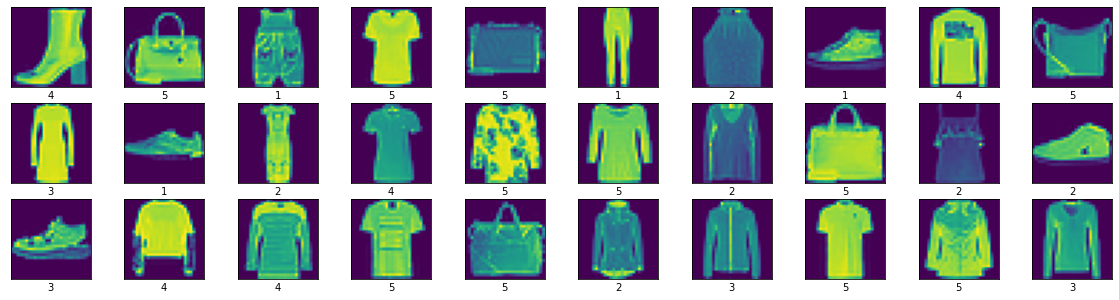

In [79]:
# Plotting some random images along with their labels to visualize the dataset
from random import randrange
l = [randrange(1, 60000, 1) for i in range(30)]
labels = [1,2,3,4,5]
Y_train_temp = Y_train.reshape(-1,)
fig = plt.figure(figsize = (20,5))
def data_viz(X,y,index):
    for i in range(30):
            v = fig.add_subplot(3, 10, i + 1, xticks=[], yticks=[])
            v.imshow(np.squeeze(X[i].reshape((28,28))))
            v.set_xlabel(labels[int(y[i])])
for i in l:
    data_viz(X_train, Y_train_temp,i)

__8) Defining a normalize function which will normalize the values of pixels between 0 to 1.__

In [80]:
# Normalizing the dataset 
# By normalizing it will be ranging between 0 to 1.
# Defining a normalize function

def normalize(X):
    max_val = np.max(X)
    min_val = np.min(X)
    normalized = (X-min_val)/(max_val-min_val)
    return normalized

__9) Reshaping the images in order to feed them to the CNN network hence the shape becomes 28 x 28 x 1 (adding channel last)__

In [81]:
# Normalizing and reshaping the image because we have the data set in form of rows and colums and since the images are not color
# we need to add a channel explicitly
# In order to feed the data to the network we need to reshape the image to i.e, 28 x 28 x 1 (adding channel to last)

# Normalizing the X_train dataset
X_train_N = normalize(X_train)
X_test_N = normalize(X_test)
X_val_N = normalize(X_val)

# Reshaping the image shape
image_shape = (28, 28, 1)
X_train_N = X_train_N.reshape(X_train_N.shape[0], *image_shape)
X_test_N = X_test_N.reshape(X_test_N.shape[0], *image_shape)
X_val_N = X_val_N.reshape(X_val_N.shape[0], *image_shape)


__Final dimensions of the dataset__

In [82]:
# Final dimensions of the train, test and validate set
#Checking the dimension of Train, test and validate sets
print('X_train:',X_train_N.shape)
print('Y_train:',Y_train.shape)
print('X_test:',X_test_N.shape)
print('Y_test:',Y_test.shape)
print('X_validate',X_val_N.shape)
print('Y_validate',Y_val.shape)

X_train: (48000, 28, 28, 1)
Y_train: (48000, 1)
X_test: (10000, 28, 28, 1)
Y_test: (10000, 1)
X_validate (12000, 28, 28, 1)
Y_validate (12000, 1)


## PART A: Different CNN implementations

### i) CNN 1 implementation
Just a single layer CNN with no drop out layer or regularization techineques<br><br>
__i)__ Number of layer: 3 <br>
__ii)__ Details about the layers
- __a)__ 2D Convolutional layer 1:<br>
- __Filters:__ 64
- __Filter size:__ 3 x 3
- __Activation Function:__ ReLU <br><br>

- __b)__ Hidden Layer 1 :<br>
- __Connection:__ Dense (Fully connected)
- __No. of neurons:__ 64
- __Activation Function:__ Sigmoid <br><br>

- __c)__ Output layer :<br>
- __Connection:__ Dense (Fully connected)
- __No. of neurons:__ 5
- __Activation Function:__ Softmax 



In [16]:
CNN1 = models.Sequential([
    
    #CNN layer 1
    layers.Conv2D(filters=64, kernel_size = (3,3), activation='relu', input_shape=(28,28,1)),
    
    layers.Flatten(),
    
    #Hidden layer 1 (Dense)
    layers.Dense(64, activation='sigmoid'),

    
    #Output layer
    layers.Dense(5, activation='softmax')
])
start_tr= time.process_time()
CNN1.compile(optimizer='Adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])
CNN1_scores = CNN1.fit(X_train_N, Y_train,validation_data = (X_val_N,Y_val),epochs=15)
end_tr = time.process_time() - start_tr
print("Training Time:",end_tr)

Epoch 1/15
1500/1500 [==============================] - 43s 28ms/step - loss: 0.5528 - accuracy: 0.7787 - val_loss: 0.4086 - val_accuracy: 0.8392
Epoch 2/15
1500/1500 [==============================] - 42s 28ms/step - loss: 0.3715 - accuracy: 0.8543 - val_loss: 0.3874 - val_accuracy: 0.8475
Epoch 3/15
1500/1500 [==============================] - 44s 30ms/step - loss: 0.3116 - accuracy: 0.8795 - val_loss: 0.3534 - val_accuracy: 0.8596
Epoch 4/15
1500/1500 [==============================] - 45s 30ms/step - loss: 0.2694 - accuracy: 0.8952 - val_loss: 0.3501 - val_accuracy: 0.8627
Epoch 5/15
1500/1500 [==============================] - 42s 28ms/step - loss: 0.2320 - accuracy: 0.9115 - val_loss: 0.3402 - val_accuracy: 0.8645
Epoch 6/15
1500/1500 [==============================] - 43s 29ms/step - loss: 0.2054 - accuracy: 0.9218 - val_loss: 0.3345 - val_accuracy: 0.8708
Epoch 7/15
1500/1500 [==============================] - 43s 28ms/step - loss: 0.1755 - accuracy: 0.9353 - val_loss: 0.3547 -

In [17]:
start_te= time.process_time()
test_score = CNN1.evaluate(X_test_N, Y_test)
end_te = time.process_time() - start_te
print('Test loss:',test_score[0])
print('Test accuracy: ',test_score[1])
print('Testing time:',end_te)

313/313 [==============================] - 2s 6ms/step - loss: 0.3991 - accuracy: 0.8728
Test loss: 0.3991292715072632
Test accuracy:  0.8727999925613403
Testing time: 10.578125


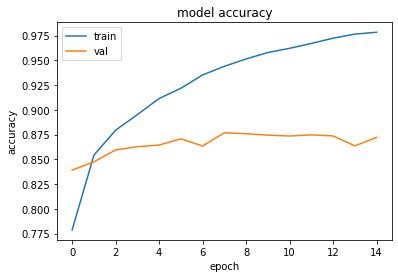

In [18]:
#plot
plt.plot(CNN1_scores.history['accuracy'])
plt.plot(CNN1_scores.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

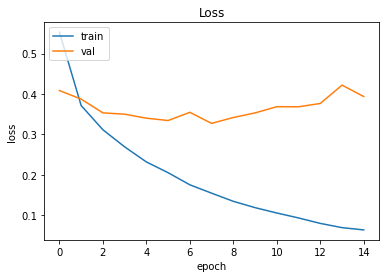

In [100]:
plt.plot(CNN1_scores.history['loss'])
plt.plot(CNN1_scores.history['val_loss'])
plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

### ii) CNN 2 Implementation

Since in the previous CNN network we had huge amount of overfitting now in order to avoid that I have decided to add another convolutional layer followed by 2 dense layers along with batch normalization, Max pooling and L2 regularization.<br><br>
__i)__ Number of layer: 9 <br>
__ii)__ Details about the layers
- __a)__ 2D Convolutional layer 1:<br>
- __Filters:__ 64
- __Filter size:__ 3 x 3
- __Activation Function:__ ReLU <br><br>


- __b)__ Batch normalization layer 1:<br><br> 

- __c)__ Max pooling layer 1:<br>
- __Pool size:__ 2 x 2 <br><br>

- __d)__ 2D Convolutional layer 2:<br>
- __Filters:__ 64
- __Filter size:__ 3 x 3
- __Activation Function:__ ReLU <br><br>

- __e)__ Batch normalization layer 1:<br><br> 

- __f)__ Max pooling layer 2:<br>
- __Pool size:__ 2 x 2 <br><br>

- __g)__ Hidden Layer 1 :<br>
- __Connection:__ Dense (Fully connected)
- __No. of neurons:__ 512
- __Activation Function:__ Sigmoid 
- __L2 regularizer:__ 0.002 <br><br>

- __h)__ Hidden Layer 2 :<br>
- __Connection:__ Dense (Fully connected)
- __No. of neurons:__ 512
- __Activation Function:__ Sigmoid 
- __L2 regularizer:__ 0.002 <br><br>

- __i)__ Output layer :<br>
- __Connection:__ Dense (Fully connected)
- __No. of neurons:__ 5
- __Activation Function:__ Softmax 

In [22]:
CNN2 = models.Sequential([
    
    #CNN layer 1
    layers.Conv2D(filters=64, kernel_size = (3,3), activation='relu',data_format='channels_last',padding='same' ,input_shape=(28,28,1)),
    
    layers.BatchNormalization(),
    
    layers.MaxPooling2D((2,2)),
    #CNN layer 2
    layers.Conv2D(filters=64, kernel_size = (3,3), activation='relu',data_format='channels_last',padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    
    layers.Flatten(),
    
    #Hidden layer 1 (Dense)
    layers.Dense(512, activation='sigmoid',kernel_regularizer=regularizers.l2(0.001)),
    
    #Hidden layer 2 (Dense)
    layers.Dense(512, activation='sigmoid',kernel_regularizer=regularizers.l2(0.001)),
    
    #Output layer
    layers.Dense(5, activation='softmax')
])

start_tr= time.process_time()
CNN2.compile(optimizer='Adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

CNN2_score=CNN2.fit(X_train_N, Y_train,validation_data = (X_val_N,Y_val),epochs=15)
end_tr = time.process_time() - start_tr
print("Training Time:",end_tr)

Epoch 1/15
1500/1500 [==============================] - 141s 94ms/step - loss: 0.8586 - accuracy: 0.7769 - val_loss: 0.7315 - val_accuracy: 0.7893
Epoch 2/15
1500/1500 [==============================] - 139s 93ms/step - loss: 0.6295 - accuracy: 0.8233 - val_loss: 0.6162 - val_accuracy: 0.8202
Epoch 3/15
1500/1500 [==============================] - 144s 96ms/step - loss: 0.5926 - accuracy: 0.8339 - val_loss: 0.5384 - val_accuracy: 0.8512
Epoch 4/15
1500/1500 [==============================] - 133s 89ms/step - loss: 0.5665 - accuracy: 0.8431 - val_loss: 0.6390 - val_accuracy: 0.8069
Epoch 5/15
1500/1500 [==============================] - 142s 95ms/step - loss: 0.5394 - accuracy: 0.8514 - val_loss: 0.9423 - val_accuracy: 0.7193
Epoch 6/15
1500/1500 [==============================] - 147s 98ms/step - loss: 0.5236 - accuracy: 0.8591 - val_loss: 0.5605 - val_accuracy: 0.8371
Epoch 7/15
1500/1500 [==============================] - 143s 95ms/step - loss: 0.5126 - accuracy: 0.8617 - val_loss: 0

In [24]:
start_te= time.process_time()
test_score = CNN2.evaluate(X_test_N, Y_test)
end_te = time.process_time() - start_te
print('Test loss:',test_score[0])
print('Test accuracy: ',test_score[1])
print('Testing time:',end_te)

313/313 [==============================] - 4s 14ms/step - loss: 0.5602 - accuracy: 0.8446
Test loss: 0.5601667165756226
Test accuracy:  0.8446000218391418
Testing time: 26.296875


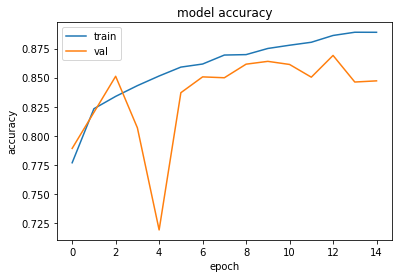

In [25]:
plt.plot(CNN2_score.history['accuracy'])
plt.plot(CNN2_score.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

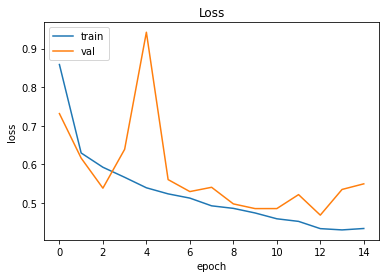

In [26]:
plt.plot(CNN2_score.history['loss'])
plt.plot(CNN2_score.history['val_loss'])
plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

### iii) CNN 3 implementation with drop out and data augmentation

Even though I added L2 regularization and a second convolutional layer which will help me increasing the complexity of network which in turn help in reducing overfitting but still the problem was not solved.

__i)__ Number of layer: 13 <br>
__ii)__ Details about the layers
- __a)__ 2D Convolutional layer 1:<br>
- __Filters:__ 64
- __Filter size:__ 3 x 3
- __Activation Function:__ ReLU <br><br>


- __b)__ Batch normalization layer 1:<br><br> 

- __c)__ Max pooling layer 1:<br>
- __Pool size:__ 2 x 2 <br><br>

- __d)__ 2D Convolutional layer 2:<br>
- __Filters:__ 64
- __Filter size:__ 3 x 3
- __Activation Function:__ ReLU <br><br>

- __e)__ Batch normalization layer 2:<br><br> 

- __f)__ Max pooling layer 2:<br>
- __Pool size:__ 2 x 2 <br><br>

- __g)__ Dropout Layer 1 :<br>
- __Dropout rate:__ 0.25 <br><br>


- __h)__ 2D Convolutional layer 3:<br>
- __Filters:__ 64
- __Filter size:__ 3 x 3
- __Activation Function:__ ReLU <br><br>

- __i)__ Batch normalization layer 3:<br><br> 

- __j)__ Dropout Layer 2 :<br>
- __Dropout rate:__ 0.25 <br><br>

- __k)__ Hidden Layer 1 :<br>
- __Connection:__ Dense (Fully connected)
- __No. of neurons:__ 128
- __Activation Function:__ relu<br><br>

- __l)__ Hidden Layer 2 :<br>
- __Connection:__ Dense (Fully connected)
- __No. of neurons:__ 64
- __Activation Function:__ relu <br><br>

- __m)__ Output layer :<br>
- __Connection:__ Dense (Fully connected)
- __No. of neurons:__ 5
- __Activation Function:__ Softmax 

In [83]:
CNN3 = models.Sequential([
    
    #CNN layer 1
    layers.Conv2D(filters=64, kernel_size = (3,3), activation='relu',data_format='channels_last',padding='same',input_shape=(28,28,1)),
    
    #Batch normalizaton
    layers.BatchNormalization(),
    
    # Max pooling 1
    layers.MaxPooling2D((2,2)),
    
    #CNN layer 2
    layers.Conv2D(filters=64, kernel_size = (3,3), activation='relu',data_format='channels_last',padding='same'),
    
    #Batch normalizaton
    layers.BatchNormalization(),
    
    # Max pooling 2
    layers.MaxPooling2D((2,2)),
    
    #Dropout layer 1
    layers.Dropout(0.1),
    
    
    #CNN layer 3
    layers.Conv2D(filters=64, kernel_size = (3,3), activation='relu',data_format='channels_last',padding='same'),
    
    #Batch normalizaton
    layers.BatchNormalization(),
     
    #Dropout layer 2
    layers.Dropout(0.2),
    
    layers.Flatten(),
    
    #Hidden layer 1 (Dense)
    layers.Dense(128, activation='relu'),
    
    
    #Hidden layer 2 (Dense)
    layers.Dense(96, activation='relu'),
    
    
    #Output layer
    layers.Dense(5, activation='softmax')
])


In [84]:
#Data Augmentation
DA = ImageDataGenerator(rotation_range = 10, zoom_range = 0.01, horizontal_flip=True,vertical_flip=True)

In [85]:
XD_train =X_train.reshape(X_train.shape[0], *image_shape)
DA.fit(XD_train)

In [86]:
XD_test =X_test.reshape(X_test.shape[0], *image_shape)
DA.fit(XD_test)

In [87]:
XD_val =X_val.reshape(X_val.shape[0], *image_shape)
DA.fit(XD_val)

In [88]:
from tensorflow.keras.utils import to_categorical

XD_train_N = normalize(XD_train)
XD_test_N = normalize(XD_test)
XD_val_N = normalize(XD_val)

Y_train_N = to_categorical(Y_train-1, num_classes=5)
Y_val_N = to_categorical(Y_val-1, num_classes=5)
Y_test_N = to_categorical(Y_test-1, num_classes=5)

In [89]:
LR = 0.005

def LR_decay(t):
    initial_LR = LR
    i = 0.4
    new_LR = initial_LR * exp(-i*t)
    return new_LR

In [90]:
learning_func = LR_decay
lrs = LearningRateScheduler(learning_func)

In [91]:
es = EarlyStopping(monitor='val_loss', patience=3)
mc = ModelCheckpoint(filepath='saved_model.h5', monitor='val_loss', save_best_only=True, verbose=1)

In [92]:
from tensorflow.keras.optimizers import Adam
start_tr = time.process_time()
CNN3.compile(optimizer=Adam(lr=0.005), loss='categorical_crossentropy',metrics=['accuracy'])

CNN3_scores = CNN3.fit(XD_train_N, Y_train_N, 
                        epochs = 30, 
                        validation_data = (XD_val_N, Y_val_N), verbose=1,steps_per_epoch=XD_train_N.shape[0] // 32, callbacks = [lrs, es, mc])
end_tr = time.process_time() - start_tr
print("Training Time:",end_tr)

Epoch 1/30
1500/1500 [==============================] - ETA: 0s - loss: 0.7041 - accuracy: 0.7450
Epoch 00001: val_loss improved from inf to 0.92130, saving model to saved_model.h5
1500/1500 [==============================] - 171s 114ms/step - loss: 0.7041 - accuracy: 0.7450 - val_loss: 0.9213 - val_accuracy: 0.6818
Epoch 2/30
1500/1500 [==============================] - ETA: 0s - loss: 0.4303 - accuracy: 0.8259
Epoch 00002: val_loss improved from 0.92130 to 0.40668, saving model to saved_model.h5
1500/1500 [==============================] - 180s 120ms/step - loss: 0.4303 - accuracy: 0.8259 - val_loss: 0.4067 - val_accuracy: 0.8296
Epoch 3/30
1500/1500 [==============================] - ETA: 0s - loss: 0.3641 - accuracy: 0.8509
Epoch 00003: val_loss improved from 0.40668 to 0.33857, saving model to saved_model.h5
1500/1500 [==============================] - 184s 123ms/step - loss: 0.3641 - accuracy: 0.8509 - val_loss: 0.3386 - val_accuracy: 0.8674
Epoch 4/30
1500/1500 [================

In [93]:
start_te= time.process_time()
test_score = CNN3.evaluate(XD_test_N, Y_test_N)
end_te = time.process_time() - start_te
print('Test loss:',test_score[0])
print('Test accuracy: ',test_score[1])
print('Testing time:',end_te)

313/313 [==============================] - 5s 15ms/step - loss: 0.2621 - accuracy: 0.9067
Test loss: 0.26206156611442566
Test accuracy:  0.9067000150680542
Testing time: 24.8125


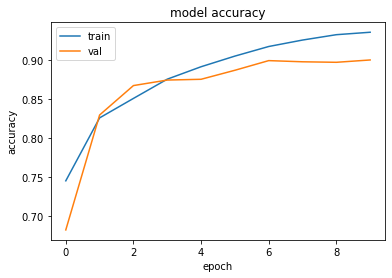

In [94]:
plt.plot(CNN3_scores.history['accuracy'])
plt.plot(CNN3_scores.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

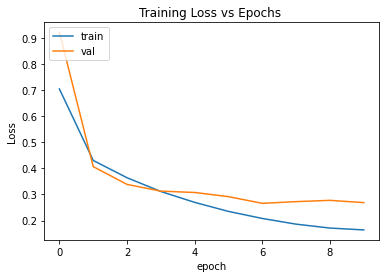

In [95]:
plt.plot(CNN3_scores.history['loss'])
plt.plot(CNN3_scores.history['val_loss'])
plt.title('Training Loss vs Epochs ')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

## PART B) Implementing a DNN variant
Here I have implemented a multi layer perceptron with following architecture <br> <br>
__i)__ Number of layer: 3 <br>
__ii)__ Details about the layers
- __a)__ Hidden layer 1:<br>
- __Connection:__ Dense (Fully connected)
- __No. of neurons:__ 512
- __Activation Function:__ Sigmoid <br><br>

- __b)__ Hidden layer 2:<br>
- __Connection:__ Dense (Fully connected)
- __No. of neurons:__ 512
- __Activation Function:__ Sigmoid <br><br>

- __c)__ Output layer :<br>
- __Connection:__ Dense (Fully connected)
- __No. of neurons:__ 5
- __Activation Function:__ Softmax 


In [96]:
MLP = models.Sequential([
        layers.Flatten(input_shape=(28,28,1)),
        layers.Dense(512, activation='sigmoid'),
        layers.Dense(512, activation='sigmoid'),
        layers.Dense(5, activation='softmax')    
    ])
start_tr = time.process_time()
MLP.compile(optimizer='Adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

MLP_scores = MLP.fit(X_train_N, Y_train,validation_data = (X_val_N, Y_val), epochs=15)
end_tr = time.process_time() - start_tr
print("Training Time:",end_tr)

Epoch 1/15
1500/1500 [==============================] - 10s 7ms/step - loss: 0.7001 - accuracy: 0.7014 - val_loss: 0.5946 - val_accuracy: 0.7558
Epoch 2/15
1500/1500 [==============================] - 9s 6ms/step - loss: 0.5166 - accuracy: 0.7889 - val_loss: 0.4986 - val_accuracy: 0.7909
Epoch 3/15
1500/1500 [==============================] - 9s 6ms/step - loss: 0.4417 - accuracy: 0.8211 - val_loss: 0.4151 - val_accuracy: 0.8286
Epoch 4/15
1500/1500 [==============================] - 9s 6ms/step - loss: 0.3987 - accuracy: 0.8388 - val_loss: 0.3924 - val_accuracy: 0.8378
Epoch 5/15
1500/1500 [==============================] - 9s 6ms/step - loss: 0.3618 - accuracy: 0.8541 - val_loss: 0.3846 - val_accuracy: 0.8443
Epoch 6/15
1500/1500 [==============================] - 9s 6ms/step - loss: 0.3413 - accuracy: 0.8612 - val_loss: 0.3733 - val_accuracy: 0.8495
Epoch 7/15
1500/1500 [==============================] - 10s 7ms/step - loss: 0.3194 - accuracy: 0.8707 - val_loss: 0.3323 - val_accurac

In [98]:
start_te= time.process_time()
test_score = MLP.evaluate(X_test_N, Y_test)
end_te = time.process_time() - start_te
print('Test loss:',test_score[0])
print('Test accuracy: ',test_score[1])
print('Testing time:',end_te)

313/313 [==============================] - 1s 3ms/step - loss: 0.3465 - accuracy: 0.8677
Test loss: 0.34647154808044434
Test accuracy:  0.8676999807357788
Testing time: 2.609375


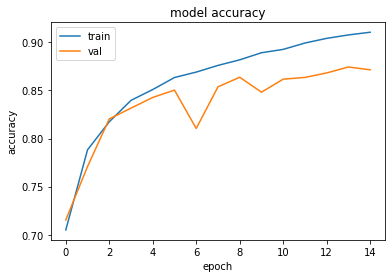

In [57]:
plt.plot(MLP_scores.history['accuracy'])
plt.plot(MLP_scores.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

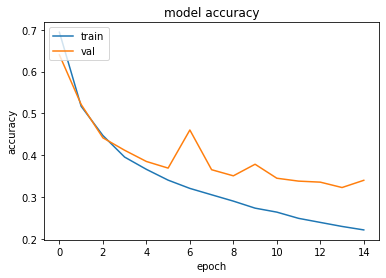

In [58]:
plt.plot(MLP_scores.history['loss'])
plt.plot(MLP_scores.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

## Implementing an ML method: Decision Tree Classifier

In [69]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score

In [63]:
D_tree = DecisionTreeClassifier(max_depth=50, random_state=42)

In [67]:
import time
start_tr= time.process_time()
D_tree.fit(X_train, Y_train)
end_tr = time.process_time() - start_tr

In [72]:
start_te= time.process_time()
Y_pred = D_tree.predict(X_test)
end_te = time.process_time() - start_te

In [73]:
D_tree_accuracy = accuracy_score(Y_test, Y_pred)
D_tree_precision = precision_score(Y_test, Y_pred, average='weighted')
D_tree_recall = recall_score(Y_test, Y_pred, average='weighted')
D_tree_f1_score = f1_score(Y_test, Y_pred, average='weighted')


print("Accuracy: ", D_tree_accuracy)
print("Precision: ", D_tree_precision)
print("Recall: ", D_tree_precision)
print("F1 Score: ", D_tree_f1_score)
print('Training time:',end_tr)
print('testing time:',end_te)

Accuracy:  0.7062
Precision:  0.7046435838396428
Recall:  0.7046435838396428
F1 Score:  0.7053505511464244
Training time: 29.921875
testing time: 0.03125
